In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

%matplotlib inline

C:\Users\ricky\AppData\Local\Temp\ipykernel_24156\1889336719.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
r = requests.get(url)
website = r.text.replace(',', '.')
tmp = pd.read_html(StringIO(website), match='Коефіцієнт народжуваності в регіонах України', encoding="UTF-8")
tmp = tmp[0]

 - Вивести перші рядки таблиці за допомогою методу head

In [3]:
tmp.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


- Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [4]:
tmp.shape

(28, 9)

- Замініть у таблиці значення "—" на значення NaN

In [5]:
tmp = tmp.replace('—', np.NaN)

- Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [6]:
tmp.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

- Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [7]:
tmp['2014'] = pd.to_numeric(tmp['2014'])
tmp['2019'] = pd.to_numeric(tmp['2019'])

tmp.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [8]:
tmp.isnull().sum()/tmp.shape[0]

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

- Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [9]:
tmp = tmp.drop(tmp.index[-1])

tmp

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


- Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [10]:
columns_to_fill = ['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']

for column in columns_to_fill:
    tmp[column] = tmp[column].fillna(tmp[column].mean()).round(2)

tmp

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.60,16.0,13.0,7.3,12.6,11.14,8.02
1,Вінницька,22.4,19.20,14.2,12.4,8.4,11.2,10.90,7.60
2,Волинська,24.7,25.00,17.9,15.3,11.2,14.8,14.10,10.10
3,Дніпропетровська,20.4,20.40,15.1,12.3,7.1,11.2,11.10,7.10
4,Донецька,27.1,21.40,14.0,10.9,6.1,9.8,8.20,8.02
5,Житомирська,26.1,22.30,15.9,12.9,8.9,12.2,12.00,7.90
6,Закарпатська,31.4,27.30,20.7,16.8,11.5,15.1,14.60,10.40
7,Запорізька,21.9,19.70,15.0,12.4,7.1,10.6,10.60,6.80
8,Івано-Франківська,24.3,24.80,18.2,15.5,10.3,12.4,12.20,8.80
9,Київська,20.4,18.90,15.6,12.3,7.3,12.2,12.10,8.00


- Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [11]:
tmp[tmp['2019'] > tmp['2019'].mean()][['Регіон', '2019']]


,Регіон,2019
0,Крим,8.02
2,Волинська,10.10
4,Донецька,8.02
6,Закарпатська,10.40
8,Івано-Франківська,8.80
11,Луганська,8.02
12,Львівська,8.70
14,Одеська,8.80
16,Рівненська,10.70
20,Херсонська,8.10


- У якому регіоні була найвища народжуваність у 2014 році?

In [12]:
tmp[['Регіон', '2014']].max()


Регіон    Чернігівська
2014              14.8
dtype: object

- Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

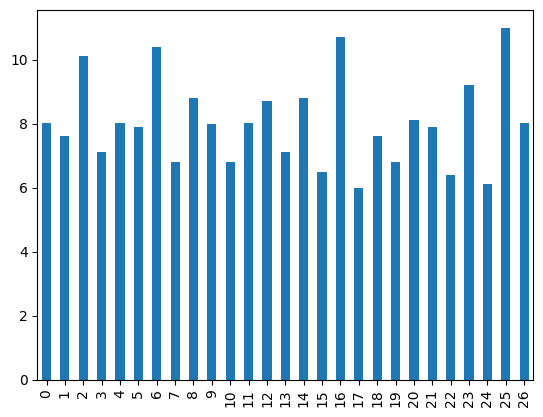

In [13]:
tmp['2019'].plot.bar()
plt.show()

- додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

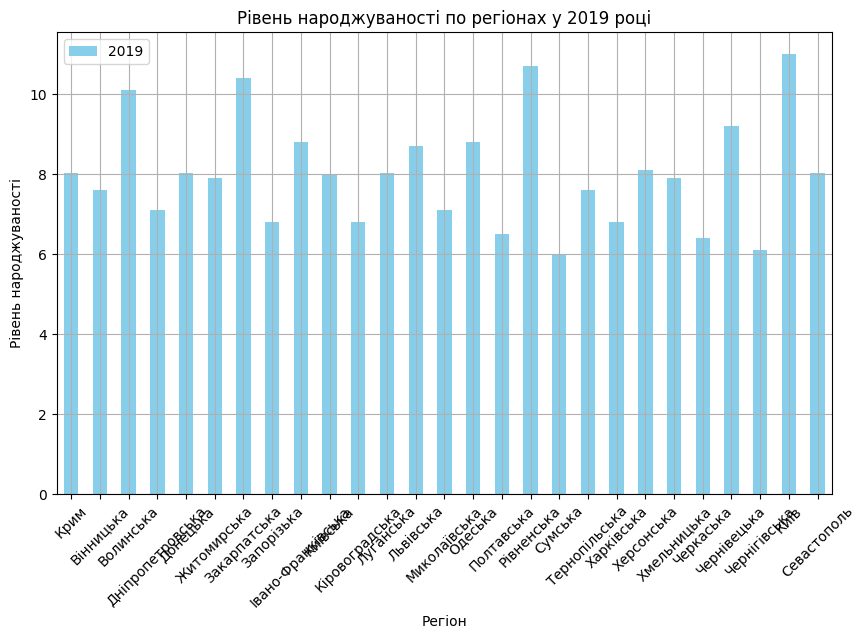

In [14]:
tmp[['Регіон', '2019']].plot.bar(x='Регіон', y='2019', figsize=(10, 6), color='skyblue')
plt.title('Рівень народжуваності по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

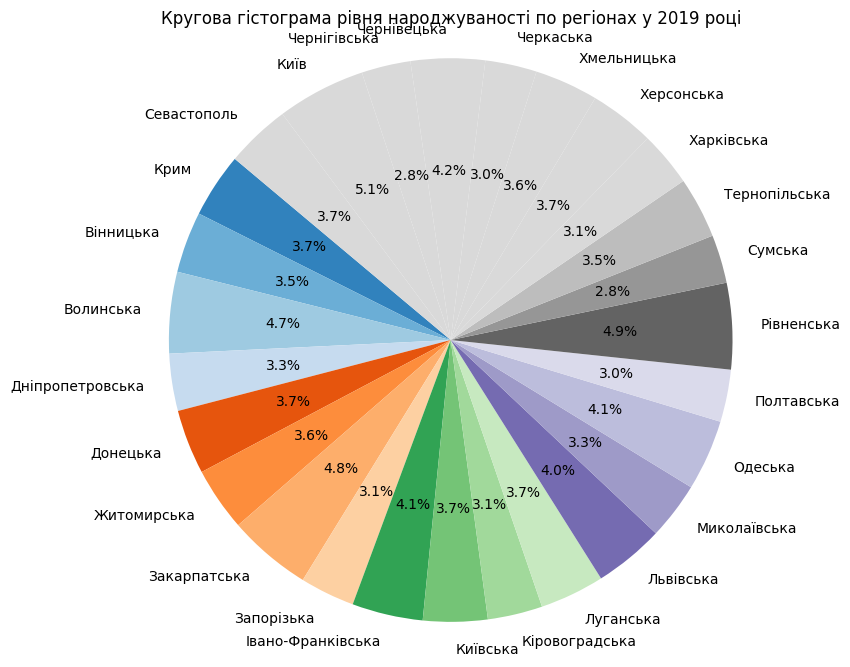

In [15]:
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20c(np.arange(len(tmp)))
plt.pie(tmp['2019'], labels=tmp['Регіон'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Кругова гістограма рівня народжуваності по регіонах у 2019 році')
plt.axis('equal')
plt.show()

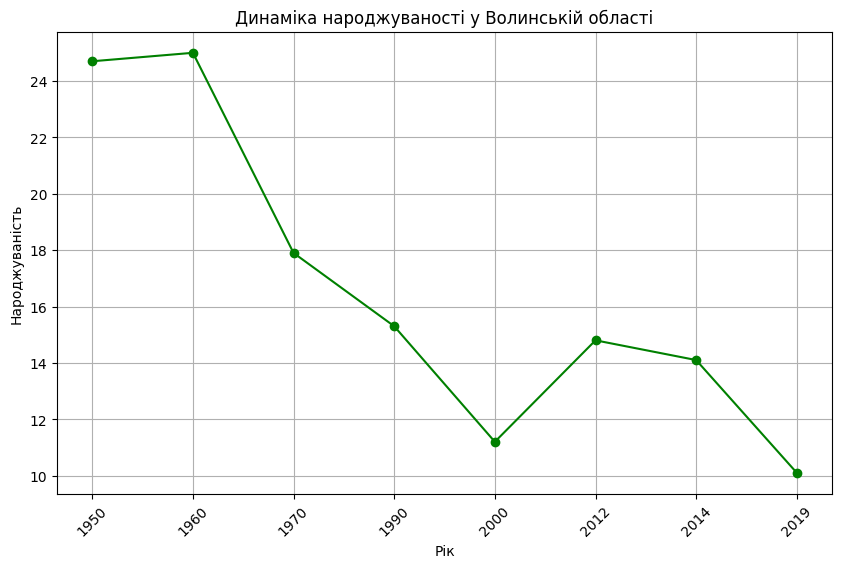

In [16]:
import matplotlib.pyplot as plt
volyn_region = tmp[tmp['Регіон'] == 'Волинська']
plt.figure(figsize=(10, 6))
plt.plot(tmp.columns[1:], volyn_region.iloc[0, 1:], marker='o', color='green', linestyle='-')
plt.title('Динаміка народжуваності у Волинській області')
plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


